# **1.Data Exploration**

In [5]:
!pip install catboost

     |████████████████████████████████| 66.2MB 43kB/s 


In [6]:
# Importing Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline

import itertools

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Load Dataset**

In [7]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving reviews_clean.csv to reviews_clean (1).csv


In [8]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['reviews_clean.csv']))

In [9]:
# Print Multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# **2.Data Visualization (EDA)**

In [10]:
#Explore Data
data.shape
type(data)
data.size
data.shape
data.head()
data.tail()
data.info()

(12002, 18)

pandas.core.frame.DataFrame

216036

(12002, 18)

,Unnamed: 0,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id,Sentiment,Label,Text_Clean,lemmatized,polarity
0,0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1,2,Rs.8989,"Lodging,Motels,Hotels,Meeting & Event Planning...",15400,Negative,0,this hotel is a dump upon checking in was told...,hotel dump check tell place book folk run isaa...,0.188788
1,1,2,Inn At Queen Anne,505 1st Ave N,Seattle,Me and the little mouse,A Traveler2,Hope you are strong enough to carry all bags u...,2,2,Rs.8457,"hotel,Hotels",17618,Negative,0,hope you are strong enough to carry all bags u...,hope strong carry bag upstairs elevator coffee...,0.091667
2,2,2,Inn At Queen Anne,505 1st Ave N,Seattle,Unique hotel with character,A Traveler23,My boyfriend and I decided to stay at this hot...,4,2,Rs.8457,"hotel,Hotels",17602,Positive,1,my boyfriend and i decided to stay at this hot...,boyfriend decide stay hotel half price good ho...,0.258333
3,3,2,Inn At Queen Anne,505 1st Ave N,Seattle,Would stay again.,A Traveler22,The hotel was quaint and had a pleasant vibe t...,4,2,Rs.8457,"hotel,Hotels",17601,Positive,1,the hotel was quaint and had a pleasant vibe t...,hotel quaint pleasant vibe good size,0.716667
4,4,2,Inn At Queen Anne,505 1st Ave N,Seattle,Never Again!,A Traveler21,"Dirty, run down, poorly represented, nothing l...",1,2,Rs.8457,"hotel,Hotels",17600,Negative,0,dirty run down poorly represented nothing like...,dirty run poorly represent like picture descri...,-0.500000


,Unnamed: 0,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id,Sentiment,Label,Text_Clean,lemmatized,polarity
11997,11997,2073,Wingate By Wyndham Atlanta Galleria Center,2762 Cobb Pkwy SE,Atlanta,Pretty Good,tammyhX3398QO,Last minute stay in a last minute location . C...,4,3,Rs.6359,"Family-Friendly Hotels,Hotels and motels,Hotel...",16960,Positive,1,last minute stay in a last minute location cle...,minute stay minute location clean room clean b...,0.226667
11998,11998,2073,Wingate By Wyndham Atlanta Galleria Center,2762 Cobb Pkwy SE,Atlanta,Atlanta Cobb wingate,tavarrush,The Wingate location was convenient and the st...,5,3,Rs.6359,"Family-Friendly Hotels,Hotels and motels,Hotel...",16978,Positive,1,the wingate location was convenient and the st...,wingate location convenient staff polite infor...,0.308333
11999,11999,2073,Wingate By Wyndham Atlanta Galleria Center,2762 Cobb Pkwy SE,Atlanta,Disappointed,wesleym252,I was very disappointed with the breakfast.......,2,3,Rs.6359,"Family-Friendly Hotels,Hotels and motels,Hotel...",17436,Negative,0,i was very disappointed with the breakfast foo...,disappointed breakfast food good room clean ni...,0.018333
12000,12000,2075,Dolphin Cove Motel,170 Main St,Pismo Beach,Affordable Beachfront,Carlos M,I have stayed at the Dolphin Cove three times ...,4,2,Rs.10077,"Hotel, Beach, and Sandwich Place,Hotels and mo...",2339,Positive,1,i have stayed at the dolphin cove three times ...,stay dolphin cove time good location beachfron...,0.495238
12001,12001,2075,Dolphin Cove Motel,170 Main St,Pismo Beach,Cozy,Misty S,My husband and I drove up the coast of Califor...,5,2,Rs.10077,"Hotel, Beach, and Sandwich Place,Hotels and mo...",8194,Positive,1,my husband and i drove up the coast of califor...,husband drive coast california book hotel room...,0.366667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12002 non-null  int64  
 1   Hotel_id        12002 non-null  int64  
 2   Hotel           12002 non-null  object 
 3   Address         12002 non-null  object 
 4   City            12002 non-null  object 
 5   Title           12002 non-null  object 
 6   Users           12002 non-null  object 
 7   Reviews         12002 non-null  object 
 8   Rating          12002 non-null  int64  
 9   Hotel_Type      12002 non-null  int64  
 10  Price           12002 non-null  object 
 11  Hotel_Category  12002 non-null  object 
 12  User_id         12002 non-null  int64  
 13  Sentiment       12002 non-null  object 
 14  Label           12002 non-null  int64  
 15  Text_Clean      12001 non-null  object 
 16  lemmatized      11998 non-null  object 
 17  polarity        12002 non-null 

In [11]:
# Checking for missing values
pd.isnull(data).any()
pd.isnull(data).sum()

Unnamed: 0        False
Hotel_id          False
Hotel             False
Address           False
City              False
Title             False
Users             False
Reviews           False
Rating            False
Hotel_Type        False
Price             False
Hotel_Category    False
User_id           False
Sentiment         False
Label             False
Text_Clean         True
lemmatized         True
polarity          False
dtype: bool

Unnamed: 0        0
Hotel_id          0
Hotel             0
Address           0
City              0
Title             0
Users             0
Reviews           0
Rating            0
Hotel_Type        0
Price             0
Hotel_Category    0
User_id           0
Sentiment         0
Label             0
Text_Clean        1
lemmatized        4
polarity          0
dtype: int64

In [12]:
# Dropping the missing values
data = data.dropna()
data = data.reset_index(drop=True)
print('Shape of dataset ',data.shape)
print(data.columns)

Shape of dataset  (11998, 18)
Index(['Unnamed: 0', 'Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users',
       'Reviews', 'Rating', 'Hotel_Type', 'Price', 'Hotel_Category', 'User_id',
       'Sentiment', 'Label', 'Text_Clean', 'lemmatized', 'polarity'],
      dtype='object')


In [13]:
# Sentiment Count
data.Sentiment.value_counts()


Positive    8935
Negative    3063
Name: Sentiment, dtype: int64

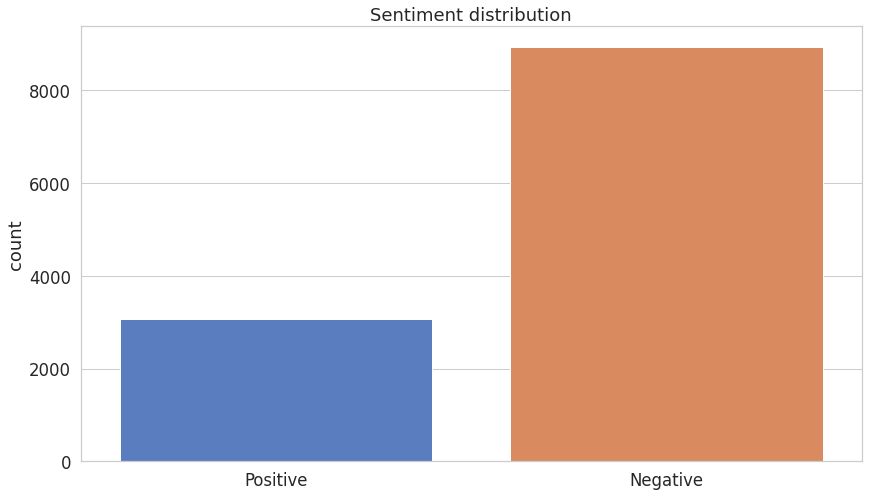

In [14]:
# Plot Showing Sentiment Distribution
f = sns.countplot(x='Sentiment', data=data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Positive', 'Negative'])
plt.xlabel("");

In [15]:
positive_sentiment=data[data['Sentiment'] == 'Positive']
negative_sentiment=data[data['Sentiment']=='Negative']

In [16]:

Reviews_all=" ".join(review for review in data.Sentiment)
Reviews_positive=" ".join(review for review in positive_sentiment.Reviews)


In [17]:
Reviews_negative=" ".join(review for review in negative_sentiment.Reviews)

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


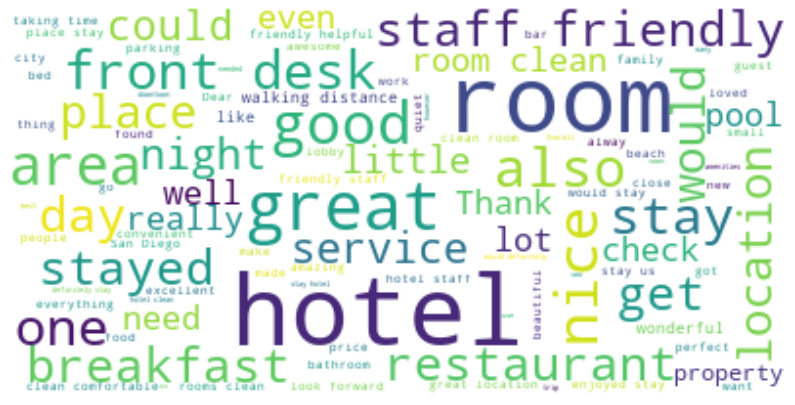

In [18]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_positive)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


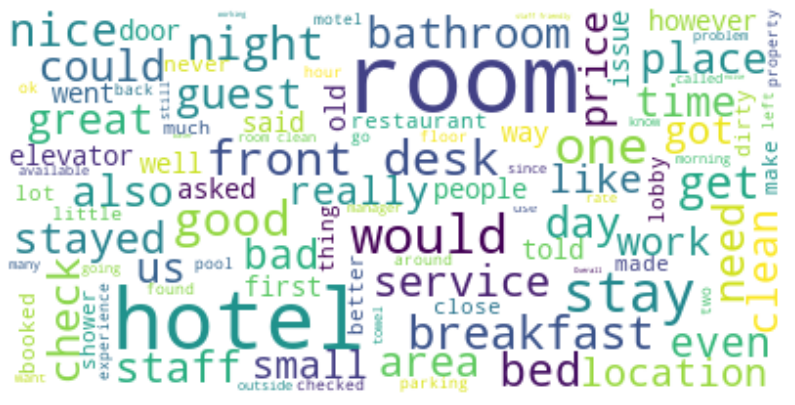

In [19]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_negative)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Splitting Dataset into Train and Test Set**


In [20]:
# Splitting the Data Set into Train and Test Sets
X = data['lemmatized']
y = data['Label']

In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(9598,)
Test Set Shape		:(2400,)


**Confusion Matrix Plot Function**


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'Positive' and 'Negative' Sentiments 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [24]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

# **3.Modelling**


This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who stayed in various different hotels and based on their stay they left the comments in travel websites. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2-3 as 'Negative' and Rating 4-5 as 'Positive'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF and Word2Vec, CNN,RNN and Factorization machine to the text data in order to turn a collection of text documents into numerical feature vectors.

**3.1 CountVectorizer Bag of Words**

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class

In [25]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [26]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 19253


In [27]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [28]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,aa,aaa,aaaa,aaaaarp,aamiaisen,aaron,aarp,aback,abandon,abbiamo,abby,abc,abd,aber,abernathy,ability,abit,abject,abjectly,able,ablemore,ablemorethank,abominableeven,abordable,abound,abour,abouthigh,aboutmore,aboutstaff,abouttick,aboveandbeyond,aboveaverage,abram,abri,abris,abroad,abrupt,abruptly,absence,absent,...,yucky,yuhanghe,yuk,yulonda,yum,yuma,yumdear,yumgaby,yummer,yummy,yup,zabriskiboundthank,zach,zack,zacks,zackzz,zak,zealand,zelos,zen,zentrale,zero,ziegenbock,zimmer,zion,zip,zipline,zipped,zlbenitesthank,zoe,zonas,zone,zoo,zoobalboa,zoobreakfast,zoom,zoop,zu,zum,zydecomm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Creating a function for applying different algorithms**


In [29]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

**Dummy Classifier**


In [30]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

DummyClassifier(constant=None, random_state=42, strategy='stratified')

f1 score: 0.6225969772073997


In [31]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25       599
           1       0.75      0.74      0.75      1801

    accuracy                           0.62      2400
   macro avg       0.50      0.50      0.50      2400
weighted avg       0.62      0.62      0.62      2400



**Logistic Regression with CountVectorizer**

In [32]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8467576068115586


**Classification Report**


In [33]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       599
           1       0.92      0.87      0.89      1801

    accuracy                           0.84      2400
   macro avg       0.79      0.82      0.80      2400
weighted avg       0.85      0.84      0.85      2400



**Confusion Matrix**


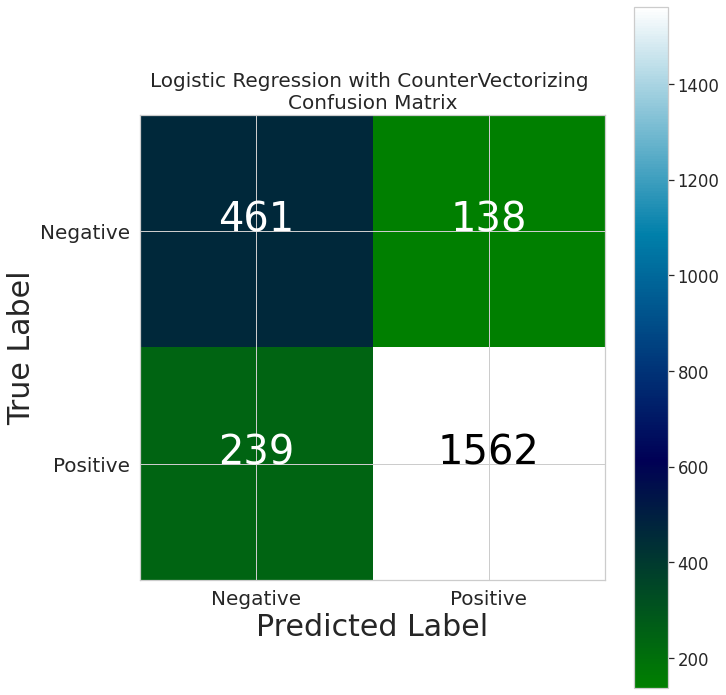

In [34]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

**Random Forest with CountVectorizer**

In [35]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8257803189953451


**Classification Report**


In [36]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.90      0.43      0.58       599
           1       0.84      0.98      0.91      1801

    accuracy                           0.85      2400
   macro avg       0.87      0.71      0.75      2400
weighted avg       0.85      0.85      0.83      2400



**Confusion Matrix**


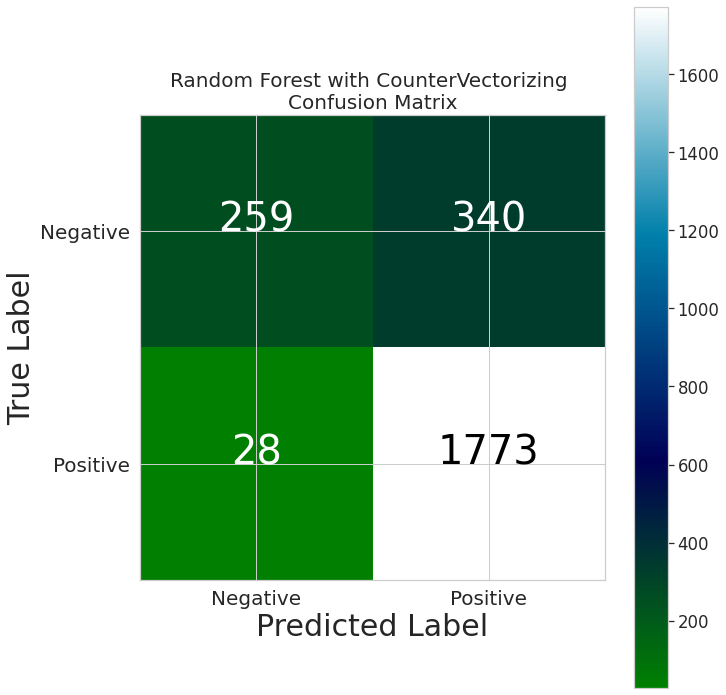

In [37]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

**Naive Bayes with CountVectorizer**

In [38]:
from sklearn.naive_bayes import MultinomialNB


In [39]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.854951514863954


**Classification Report**


In [40]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       599
           1       0.88      0.94      0.91      1801

    accuracy                           0.86      2400
   macro avg       0.83      0.78      0.80      2400
weighted avg       0.86      0.86      0.85      2400



**Confusion Matrix**


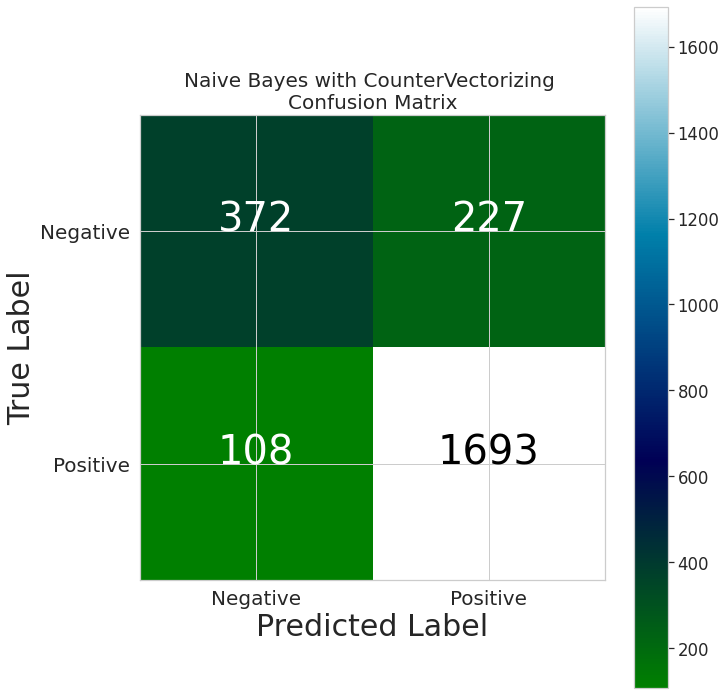

In [41]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

**XG Boost with CountVectorizer**

In [42]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.808645201919576


**Classification Report**


In [43]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.87      0.39      0.54       599
           1       0.83      0.98      0.90      1801

    accuracy                           0.83      2400
   macro avg       0.85      0.69      0.72      2400
weighted avg       0.84      0.83      0.81      2400



**Confusion Matrix**


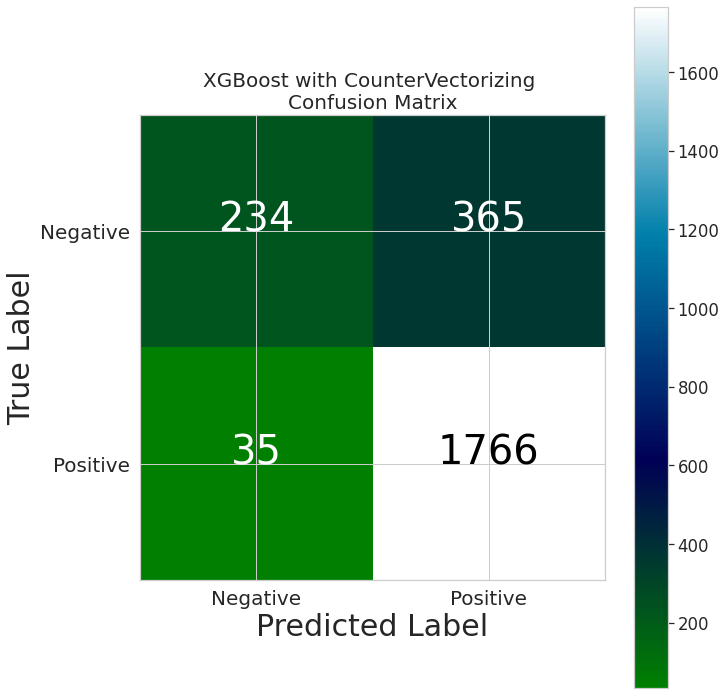

In [44]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

**CatBoost with CountVectorizer**

In [45]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.5487184	total: 80.8ms	remaining: 8s
1:	learn: 0.5194164	total: 113ms	remaining: 5.52s
2:	learn: 0.4954050	total: 143ms	remaining: 4.64s
3:	learn: 0.4753632	total: 173ms	remaining: 4.14s
4:	learn: 0.4663346	total: 202ms	remaining: 3.83s
5:	learn: 0.4555143	total: 233ms	remaining: 3.66s
6:	learn: 0.4441900	total: 273ms	remaining: 3.63s
7:	learn: 0.4359619	total: 311ms	remaining: 3.58s
8:	learn: 0.4293164	total: 343ms	remaining: 3.46s
9:	learn: 0.4206702	total: 374ms	remaining: 3.37s
10:	learn: 0.4137746	total: 405ms	remaining: 3.27s
11:	learn: 0.4097171	total: 435ms	remaining: 3.19s
12:	learn: 0.4047660	total: 466ms	remaining: 3.12s
13:	learn: 0.4001615	total: 497ms	remaining: 3.05s
14:	learn: 0.3945053	total: 532ms	remaining: 3.02s
15:	learn: 0.3889615	total: 564ms	remaining: 2.96s
16:	learn: 0.3840585	total: 596ms	remaining: 2.91s
17:	learn: 0.3806005	total: 636ms	remaining: 2.9s
18:	learn: 0.3775254	total: 670ms	remaining: 2.86s
19:	learn: 0.3740175	total: 704ms	remaining:

**Classification Report**


In [46]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64       599
           1       0.86      0.94      0.90      1801

    accuracy                           0.85      2400
   macro avg       0.82      0.75      0.77      2400
weighted avg       0.84      0.85      0.84      2400



**Confusion Matrix**


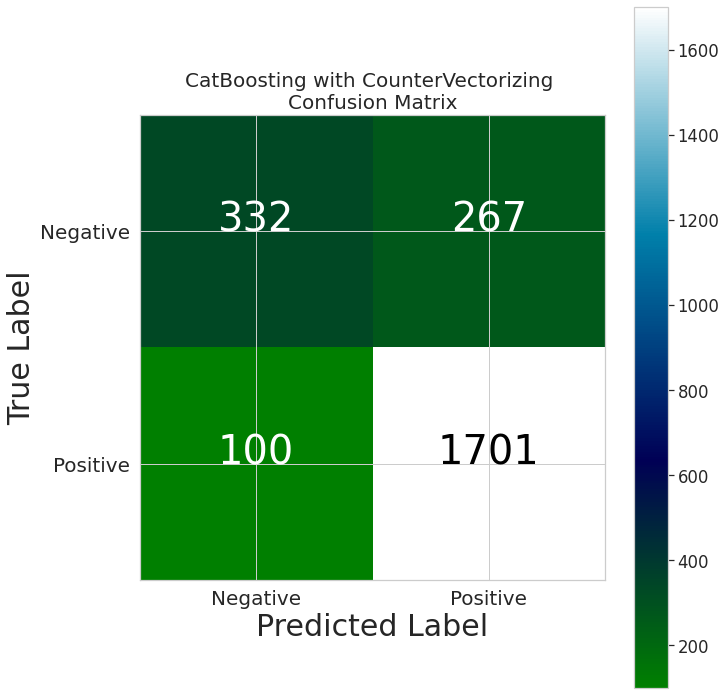

In [47]:

# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

**Comparison of Models with CountVectorizer**


In [48]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [49]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])
   



**Function for f1 Score Plotting**


In [50]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [51]:
from sklearn import metrics


In [52]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])
               

In [53]:
df_tv2

precision  ...  support
vectorizer model         accuracy class               ...         
CountVect  LogReg        0.842917 bad       0.658571  ...    599.0
                                  good      0.918824  ...   1801.0
                                  average   0.853869  ...   2400.0
           Random Forest 0.846667 bad       0.902439  ...    599.0
                                  good      0.839091  ...   1801.0
                                  average   0.854902  ...   2400.0
           Naive Bayes   0.860417 bad       0.775000  ...    599.0
                                  good      0.881771  ...   1801.0
                                  average   0.855123  ...   2400.0
           XGBoost       0.833333 bad       0.869888  ...    599.0
                                  good      0.828719  ...   1801.0
                                  average   0.838994  ...   2400.0
           CatBoost      0.847083 bad       0.768519  ...    599.0
                                  good      0.864329  ...   1801.0
                                  average   0.840417  ...   2400.0

[15 rows x 4 columns]

**Average f1 Score - Models with CountVectorizer**


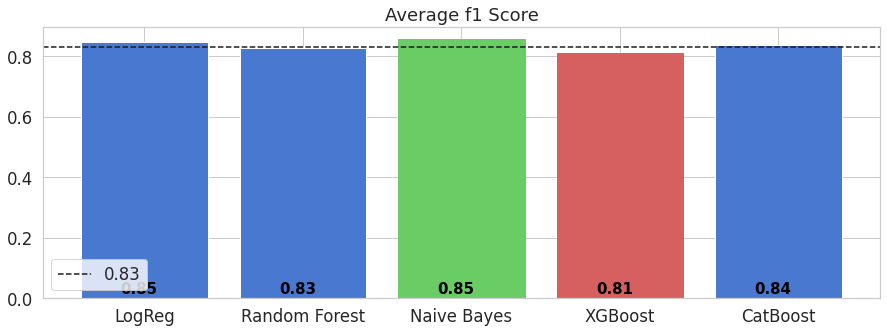

In [54]:

# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In [55]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

**Logistic Regression with TF-IDF**

In [56]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8417453545371637


**Classification Report**

In [57]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       599
           1       0.93      0.85      0.89      1801

    accuracy                           0.84      2400
   macro avg       0.78      0.83      0.80      2400
weighted avg       0.86      0.84      0.84      2400



**Confusion Matrix**

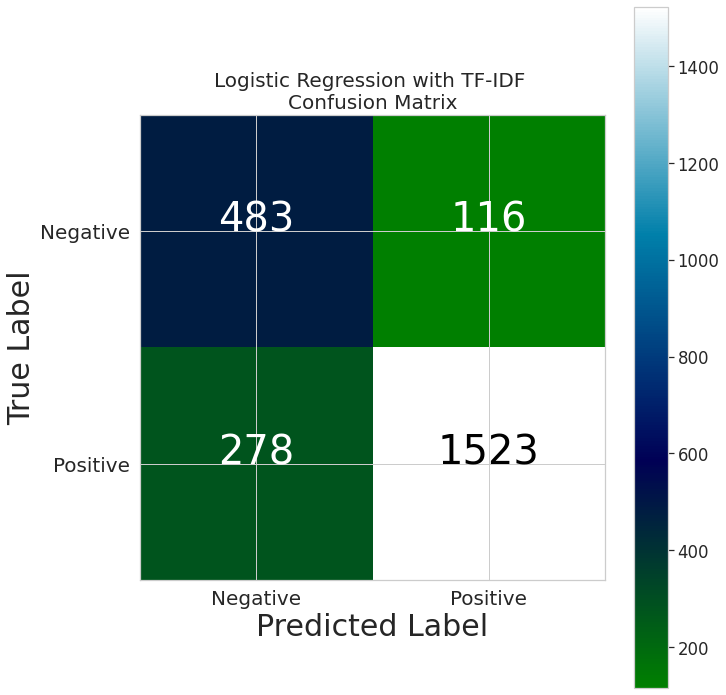

In [58]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

**Random Forest with TF-IDF**


In [59]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8079953958850414


**Classification Report**

In [60]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.89      0.38      0.53       599
           1       0.83      0.99      0.90      1801

    accuracy                           0.83      2400
   macro avg       0.86      0.68      0.72      2400
weighted avg       0.84      0.83      0.81      2400



**Confusion Matrix**

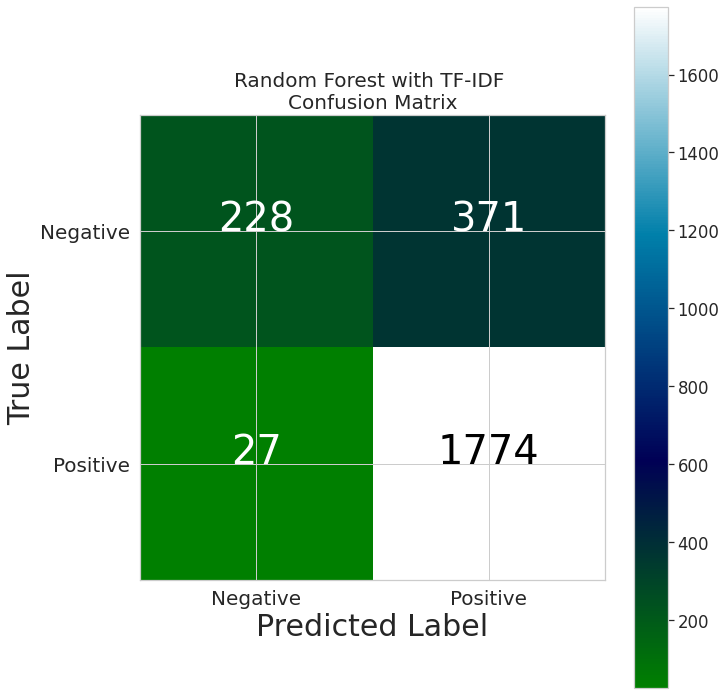

In [61]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

**Naive Bayes with TF-IDF**

In [62]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.7277483899149868


**Classification Report**

In [63]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.96      0.16      0.28       599
           1       0.78      1.00      0.88      1801

    accuracy                           0.79      2400
   macro avg       0.87      0.58      0.58      2400
weighted avg       0.83      0.79      0.73      2400



**Confusion Matrix**

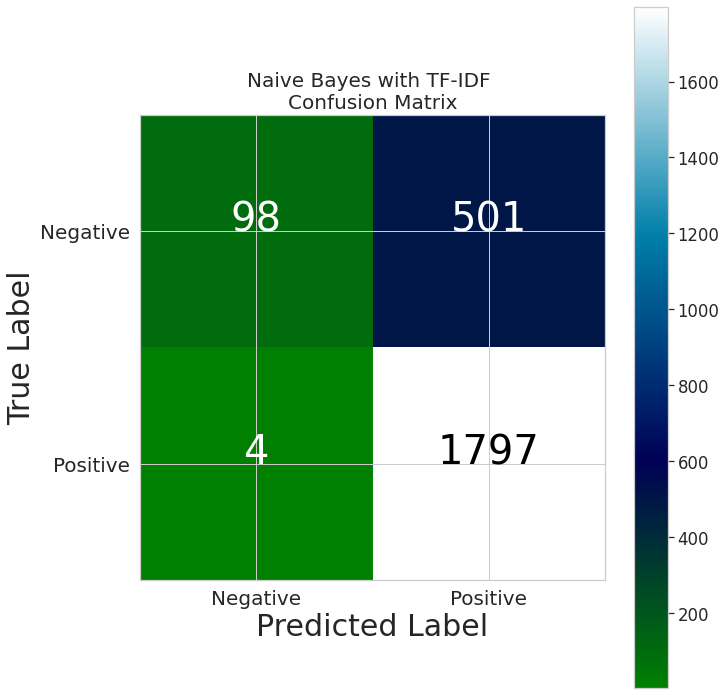

In [64]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

**XGBoost with TF-IDF**

In [65]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.8101262581489569


**Classification Report**

In [66]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55       599
           1       0.83      0.98      0.90      1801

    accuracy                           0.83      2400
   macro avg       0.85      0.69      0.72      2400
weighted avg       0.84      0.83      0.81      2400



**Confusion Matrix**

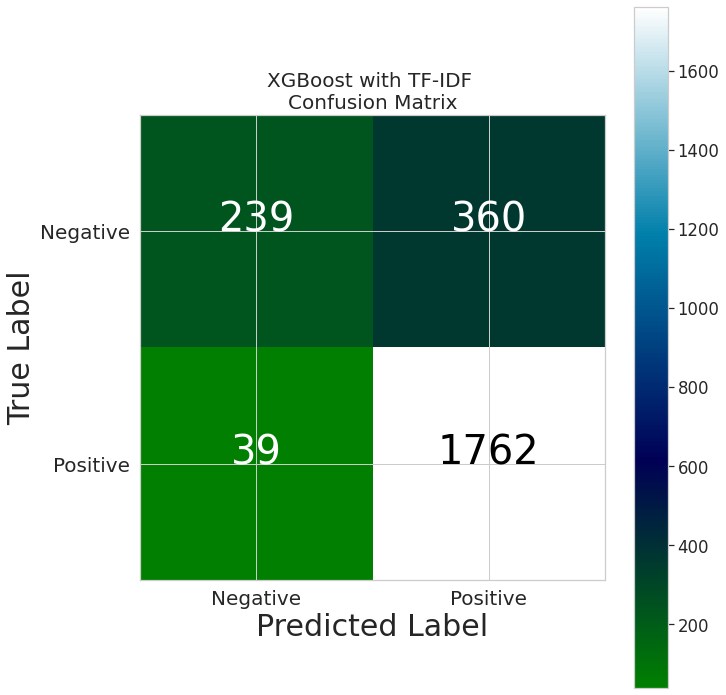

In [67]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

**CatBoost with TF-IDF**

In [68]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.5297500	total: 67.3ms	remaining: 6.66s
1:	learn: 0.5054846	total: 130ms	remaining: 6.37s
2:	learn: 0.4897873	total: 193ms	remaining: 6.25s
3:	learn: 0.4688776	total: 259ms	remaining: 6.22s
4:	learn: 0.4607454	total: 327ms	remaining: 6.22s
5:	learn: 0.4541530	total: 390ms	remaining: 6.11s
6:	learn: 0.4467154	total: 458ms	remaining: 6.08s
7:	learn: 0.4378851	total: 525ms	remaining: 6.04s
8:	learn: 0.4307392	total: 590ms	remaining: 5.96s
9:	learn: 0.4240354	total: 653ms	remaining: 5.88s
10:	learn: 0.4144144	total: 716ms	remaining: 5.79s
11:	learn: 0.4081474	total: 781ms	remaining: 5.73s
12:	learn: 0.4031302	total: 846ms	remaining: 5.66s
13:	learn: 0.3968736	total: 913ms	remaining: 5.61s
14:	learn: 0.3905465	total: 977ms	remaining: 5.54s
15:	learn: 0.3864503	total: 1.04s	remaining: 5.46s
16:	learn: 0.3826385	total: 1.11s	remaining: 5.4s
17:	learn: 0.3789307	total: 1.17s	remaining: 5.33s
18:	learn: 0.3738674	total: 1.24s	remaining: 5.26s
19:	learn: 0.3692350	total: 1.3s	remainin

**Classification Report**

In [69]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65       599
           1       0.87      0.93      0.90      1801

    accuracy                           0.85      2400
   macro avg       0.81      0.76      0.78      2400
weighted avg       0.84      0.85      0.84      2400



**Confusion Matrix**

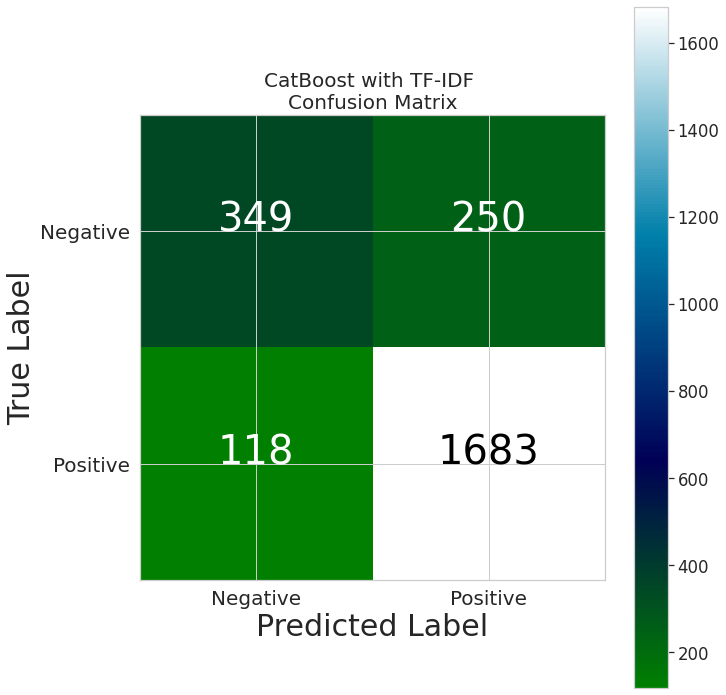

In [70]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [71]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [72]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  ...  support
vectorizer model         accuracy class               ...         
CountVect  LogReg        0.835833 bad       0.634691  ...    599.0
                                  good      0.929225  ...   1801.0
                                  average   0.855714  ...   2400.0
           Random Forest 0.834167 bad       0.894118  ...    599.0
                                  good      0.827040  ...   1801.0
                                  average   0.843781  ...   2400.0
           Naive Bayes   0.789583 bad       0.960784  ...    599.0
                                  good      0.781984  ...   1801.0
                                  average   0.826610  ...   2400.0
           XGBoost       0.833750 bad       0.859712  ...    599.0
                                  good      0.830349  ...   1801.0
                                  average   0.837677  ...   2400.0
           CatBoost      0.846667 bad       0.747323  ...    599.0
                                  good      0.870667  ...   1801.0
                                  average   0.839883  ...   2400.0

[15 rows x 4 columns]

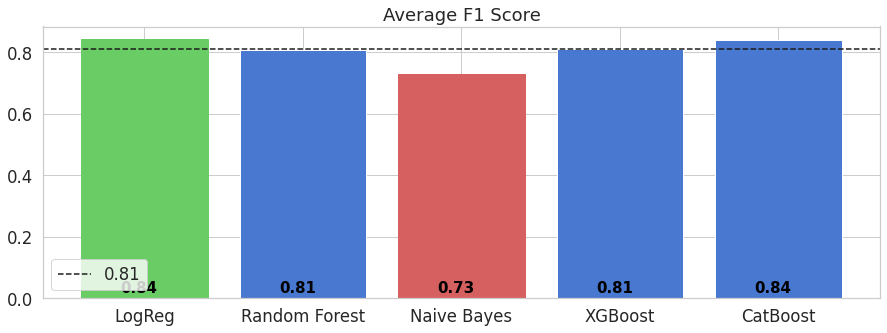

In [73]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")